<a href="https://colab.research.google.com/github/AashiDutt/Deep-Learning-with-Python-edition-2/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BOOK - DEEP LEARNING WITH PYTHON (EDITION 2)

##Code - Chapter 4 (Getting started with Neural Networks - classification and Regression)

#**1.Binary Classification Example**

#*The IMDB Dataset*

In [18]:
# total reviews = 50,000
# training data = 25,000
# test data = 25,000 with 50% negative and 50% positive reviews

# Reviews are already converted from sequence of words to sequences of integers.

# 1. Loading Data

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) # keep only top 1000 most frequently occuring words in training data

17473536/17464789 [==============================] - 0s 0us/step


In [19]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [20]:
train_labels[0]

1

In [21]:
# since, we are keeping just top 10,000 words
max([max(sequence) for sequence in train_data])

9999

In [22]:
#EXTRA CODE FOR - Decoding reviews back to text
# dictionary mapping indices to words

word_index = imdb.get_word_index()

reverse_word_index = dict(   # reverses mapping, indices to words
    [(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# indices are offset by 3, 0 -"padding", 1 - "start of sequence", 2 - "unknown"


1654784/1641221 [==============================] - 0s 0us/step


In [23]:
# preparing data
# sequence of integers have different lenghts and can't be fed to NN directly as it requires contiguous batches of data.

# Turn list into tensors using Multi-Hot Encoding (converts list to vectors of 0's and 1's)

import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) # create all zeros matrix of shape (len(sequences), dimension)
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i , j] = 1.
  return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)






In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
#Vectorize labels

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


#Building the model

Problem - Input data is a vector and labels are scalars. 

Solution - A plain stack of densely connected layers with relu activation.

Two key architecture decisions:
- how many layers to use.
- how many units to choose for each layer.



In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")])

In [27]:
# compiling the model

model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [28]:
# Setting aside validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [29]:
# Training model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5216 - accuracy: 0.7726 - val_loss: 0.3901 - val_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3095 - accuracy: 0.9019 - val_loss: 0.3065 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2254 - accuracy: 0.9277 - val_loss: 0.2799 - val_accuracy: 0.8930
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1787 - accuracy: 0.9444 - val_loss: 0.2966 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1453 - accuracy: 0.9547 - val_loss: 0.2843 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1167 - accuracy: 0.9651 - val_loss: 0.3245 - val_accuracy: 0.8767
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0966 - accuracy: 0.9719 - val_loss: 0.3109 - val_accuracy: 0.8815
Epoch 8/20
30

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

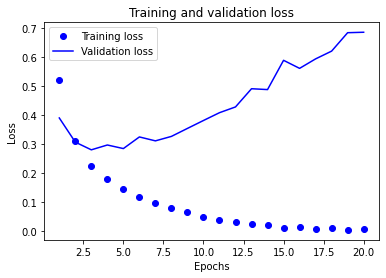

In [31]:
# Plotting losses

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

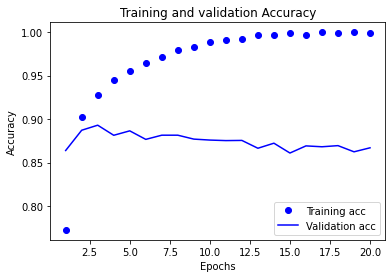

In [32]:
# Plotting Accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training accuracy increases and training loss decreases with every epoch.

While validation accuracy decreases with every epoch. 

This shows that model don't generalize to data outside of training set.

Hence, **Model is Overfitting.**


In [33]:
# Retraining Model from scratch

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")])

model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4381 - accuracy: 0.8234
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2538 - accuracy: 0.9121
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1981 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.8821


In [34]:
results # 1st number is test loss and 2nd number is test accuracy

[0.2972642183303833, 0.8821200132369995]

In [35]:
# predicting on new data
model.predict(x_test)

array([[0.19259346],
       [0.99988043],
       [0.7382475 ],
       ...,
       [0.11687094],
       [0.07274094],
       [0.52658296]], dtype=float32)

#Text Classification Example

#*The Reuters Dataset*

Dataset has 46 different topics(Labels = 0 to 45),some more represented than others.

Each topic has atleast 10 examples.

We take 10000 most frequently occuring words.

In [36]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 1000)

2121728/2110848 [==============================] - 0s 0us/step


In [37]:
len(train_data)


8982

In [38]:
len(test_data)

2246

In [39]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2,
 2,
 14,
 46,
 2,
 2,
 86,
 61,
 2,
 2,
 14,
 61,
 451,
 2,
 17,
 12]

In [40]:
train_labels[10]

3

In [41]:
# Preparing data
# converting list to vectors of 0's and 1's  

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [42]:
# Vectorizing Labels
# Labels are in form of list (0 to 45) 
# Either covert label list to integer tensor
# or use One hot Encoding - categorical encoding


def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
      results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Built-in way to do one hot encoding in categorical data - categorical encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)

y_test = to_categorical(test_labels)

In [43]:
# Building Model

model = keras.Sequential([
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(46, activation = "softmax")
                                       
])

In [44]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [45]:
# Validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [46]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 52ms/step - loss: 2.6640 - accuracy: 0.4949 - val_loss: 1.8231 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 1.5938 - accuracy: 0.6736 - val_loss: 1.4278 - val_accuracy: 0.6720
Epoch 3/20
16/16 [==============================] - 1s 79ms/step - loss: 1.3091 - accuracy: 0.7125 - val_loss: 1.2541 - val_accuracy: 0.7090
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 1.1478 - accuracy: 0.7472 - val_loss: 1.1499 - val_accuracy: 0.7510
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0334 - accuracy: 0.7749 - val_loss: 1.0958 - val_accuracy: 0.7680
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.9439 - accuracy: 0.7930 - val_loss: 1.0476 - val_accuracy: 0.7770
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8640 - accuracy: 0.8076 - val_loss: 1.0225 - val_accuracy: 0.7780
Epoch 8/20
16

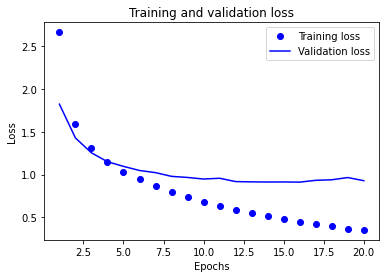

In [47]:
# Plotting losses

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

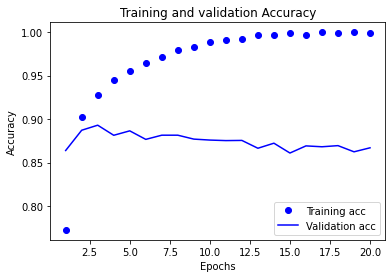

In [48]:
# Plotting Accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model is overfitting!!

In [49]:
# Retraining Model
model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(46, activation = "softmax")])

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 9, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 39ms/step - loss: 2.5719 - accuracy: 0.5040
Epoch 2/9
18/18 [==============================] - 1s 38ms/step - loss: 1.5451 - accuracy: 0.6730
Epoch 3/9
18/18 [==============================] - 1s 38ms/step - loss: 1.2733 - accuracy: 0.7151
Epoch 4/9
18/18 [==============================] - 1s 40ms/step - loss: 1.1148 - accuracy: 0.7540
Epoch 5/9
18/18 [==============================] - 1s 38ms/step - loss: 0.9961 - accuracy: 0.7815
Epoch 6/9
18/18 [==============================] - 1s 38ms/step - loss: 0.9002 - accuracy: 0.7988
Epoch 7/9
18/18 [==============================] - 1s 39ms/step - loss: 0.8230 - accuracy: 0.8138
Epoch 8/9
18/18 [==============================] - 1s 38ms/step - loss: 0.7554 - accuracy: 0.8253
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9867 - accuracy: 0.7734


In [50]:
results # ~ 77% test accuracy

[0.9867397546768188, 0.7733749151229858]

In [51]:
predictions = model.predict(x_test)

In [52]:
predictions[0].shape # predictions has vector length of 46

(46,)

In [53]:
np.sum(predictions[0]) # vector sum of coefficients is 1 as they form a probability distribution

1.0

In [54]:
# get prediction for 1st entry
np.argmax(predictions[0])

3

# **Regression Example**

##**Boston Housing Prices**

Predicting median prices of homes.

total data points = 506

training samples = 404

test samples = 102

*Each (13) feature(s) in input data has different scale*

Price(in dollars)- $10,000 - $50,000

In [55]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

In [56]:
train_data.shape

(404, 13)

In [57]:
test_data.shape

(102, 13)

(102, 13) -  13 is numerical features - crime rate, average number of rooms etc..

In [58]:
# median values 
train_targets[10]

12.1

**Problem** to feed into a NN values that take wildly different ranges.

i.e if one feature has value ranging from 0 to 1 , then another feature has values ranging from 1 to 12

**Solution** - Feature-wise Normalization

for each feature in input data, subtract the mean of feature and divide by standard deviation.

Now, the feature is centered around 0 and has a unit standrd deviation.

In [59]:
# preparing data

mean = train_data.mean(axis =0)
train_data -= mean # subtract mean of feature
std = train_data.std(axis = 0)
train_data /=std # divide by std
test_data -= mean
test_data /= std


In [60]:
# Model (small model because we have few samples available only)
def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation = "relu"),
                            layers.Dense(64, activation = "relu"),
                            layers.Dense(1) #no activation for scalar regression
  ])
  model.compile(optimizer = "rmsprop", loss = "mse", metrics =["mae"])
  return model

if last layer had sigmoid activation then, it could only predict in 0 or 1. but now it is free to predict values in any range.

Validation set is small because we have small dataset.As a result validation score varies a lot.

K-Fold Cross Validation

Splitting available data into K partitions (K = 4,5) instantiating K identical models and training each one on K -1 partitions while evaluating on the remaining partition.

In [87]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i* num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples :]], axis = 0
  )
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
      train_targets[(i + 1)* num_val_samples:]],axis = 0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 16, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)  

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [88]:
all_scores

[2.066072463989258, 2.662353277206421, 2.404146671295166, 2.333103656768799]

In [89]:
np.mean(all_scores)

2.366419017314911

In [91]:
# Saving Validation logs at each fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples :]], axis = 0
  )
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
      train_targets[(i + 1)* num_val_samples:]],axis = 0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 16, verbose = 0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [92]:
average_mae_history =[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

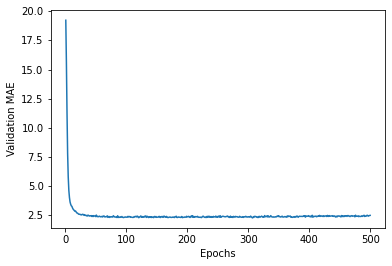

In [93]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

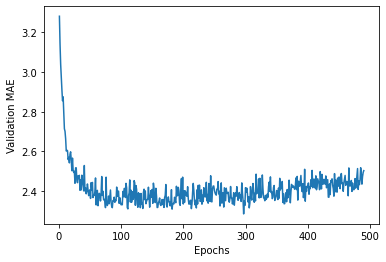

In [94]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [95]:
model = build_model()
model.fit(train_data, train_targets, epochs= 130, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.9755 - mae: 2.8433


In [96]:
test_mae_score

2.8433282375335693

In [97]:
predictions = model.predict(test_data)
predictions[0]

array([9.556539], dtype=float32)